# Plotting notebook
This notebook shows how to plot figures. The steps are as follows:
- 1. Import dependencies and install packages
- 2. Import the main new dataset and import previous Kilauea datasets (GPL and JPET)
- 3. Plot pressure-depth violins
- 4. Plot Fo vs P with equilibrium field
- 5. Plot GOS vs P
- 6. Plot crystal vs P for each sample

## 1. Import packages and setup folders and paths

### Install packages if not installed

In [69]:
#%pip install --upgrade DiadFit
#%pip install Thermobar

### Import packages

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import DiadFit as pf
import os
import pickle

mpl.rcParams['pdf.fonttype'] = 42  # 42 is for TrueType fonts

### Setup folders and data paths

In [86]:
# This is to make sure the code runs regardless of operating system
if os.name=='posix':
    slash='/'
else:
    slash='\\'

# Set master folder
MasterFolder=os.path.dirname(os.getcwd())

#Folder to save figures

figpath=MasterFolder +slash+"Plotting_notebooks"+slash+'Notebook_Figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)
# Create folder to save full datasets

compilation_folder=MasterFolder +slash+"Plotting_notebooks"+slash+'Notebook_Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

## 2. Import all datasets

### Import new Pre-Post Caldera data


In [87]:
newdata=pd.read_excel(MasterFolder +slash+"Data_processing_notebooks"+slash+'Notebook_Compiled_data'+slash+'FinalNewDataset.xlsx')

newdata =newdata.loc[:, ~newdata.columns.str.contains('Unnamed')].copy()

newdata.head()

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,919_50_FIA,0.141984,0.008781,0.007880,0.003876,103.108584,0.019886,0.000992,0.019891,12.027,...,1586.067191,50,0.141984,0.008781,NaN,0,denlinger_lerner,DZ06,0.065145,0.033490
1,919_50_FIB,0.151694,0.004892,0.002947,0.003905,103.133089,0.007437,0.000995,0.007381,12.021,...,1586.067191,50,0.151694,0.004892,NaN,0,denlinger_lerner,DZ06,0.061202,0.031835
2,919_51_FIA,0.191270,0.004434,0.003749,0.002369,103.221905,0.009185,0.001005,0.009143,12.018,...,1585.870579,50,0.191270,0.004434,NaN,0,denlinger_lerner,DZ06,0.051709,0.028335
3,919_52_FIA,0.153743,0.004916,0.002978,0.003912,103.138260,0.007515,0.001008,0.007458,12.009,...,1581.879866,50,0.153743,0.004916,NaN,0,denlinger_lerner,DZ06,0.060602,0.031591
4,919_52_FIB,0.143131,0.005096,0.003305,0.003879,103.111478,0.008341,0.001011,0.008292,12.006,...,1582.911649,50,0.143131,0.005096,NaN,0,denlinger_lerner,DZ06,0.064755,0.033323


### Import the re-processed JPET data (September 2023 rapid response)
We re-processed (SO2 mol%, T from Fo, XH2O and PD MC simulations) this literature dataset for consistency in comparisons

In [88]:
K23=pd.read_excel(MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_reprocessing_Literature'+slash+'Notebook_Compiled_data'+slash+'K23_recalculated.xlsx')
K23 =K23.loc[:, ~K23.columns.str.contains('Unnamed')]

K23.head()

,Column headers,py_index,Crystal Name,FI Name,Reported density mean of reps?,Density g/cm3,"σ Density g/cm3 (as plotted, from DiadFit for individual, Std dev for averaged FI)",STDofreps_Density g/cm3,σ Density g/cm3 (DiadFit),σ Density g/cm3 (from Ne+peakfit),...,T_K_input,error_T_KMCSim,CO2_dens_gcm3_input,error_CO2_dens_gcm3MCSim,crust_dens_kgm3_input,error_crust_dens_kgm3MCSim,model,EOSMCSim,XH2O_input,error_XH2O
0,NaN,0,K23_101,K23_101_FIC,No,0.085665,0.007736,NaN,0.007736,0.006738,...,1565.805593,50,0.085665,0.007736,NaN,0,denlinger_lerner,DZ06,0.108233,0.053578
1,NaN,1,K23_101,K23_101_FID,No,0.100137,0.005037,NaN,0.005037,0.003301,...,1565.805593,50,0.100137,0.005037,NaN,0,denlinger_lerner,DZ06,0.093852,0.046643
2,NaN,2,K23_102,K23_102_FIA,No,0.112454,0.004482,NaN,0.004482,0.002350,...,1564.096549,50,0.112454,0.004482,NaN,0,denlinger_lerner,DZ06,0.083756,0.041885
3,NaN,15,KS23_103,K23_103_FIC,No,0.114374,0.004013,NaN,0.004013,0.001231,...,1511.482018,50,0.114374,0.004013,NaN,0,denlinger_lerner,DZ06,0.085135,0.042535
4,NaN,16,KS23_103,K23_103_FID,Yes,0.126346,0.001619,0.001619,0.004087,0.001400,...,1511.482018,50,0.126346,0.001619,NaN,0,denlinger_lerner,DZ06,0.076872,0.038712


### Import the re-processed LERZ 2018 data (GPL paper)
We re-processed (SO2 mol%, T from Fo, XH2O and PD MC simulations) this literature dataset for consistency in comparisons

In [89]:
LERZ2018=pd.read_excel(MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_reprocessing_Literature'+slash+'Notebook_Compiled_data'+slash+'LERZ2018_recalculated.xlsx')
LERZ2018 =LERZ2018.loc[:, ~LERZ2018.columns.str.contains('Unnamed')]

LERZ2018.head()

,Py_index,Event Description,"Event ID (LL8 - July, LL7-Aug, LL4-May)",Host crystal ID,Fluid inclusion ID,Raman Data >,Fermi Diad separation ΔCO2 (cm-1),Corrected ΔCO2 (cm-1),Corrected ΔCO2 1σ (cm-1),CO2 density (g/cm3),...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,0,"LERZ, Fissure 8, May 30th 2018",LL4,LL4-14dp,LL4-14dp-FI#1,ν1 refers to the low wavenumber band of the fe...,103.416763,103.186144,0.006461,0.176605,...,1532.873187,50,0.176605,0.001314,NaN,0,denlinger_lerner,DZ06,0.055466,0.029614
1,1,"LERZ, Fissure 8, May 30th 2018",LL4,LL4-14dp,LL4-14dp-FI#2,NaN,103.431244,103.195894,0.007137,0.180578,...,1531.215163,50,0.180578,0.002910,NaN,0,denlinger_lerner,DZ06,0.054643,0.029323
2,2,"LERZ, Fissure 8, May 30th 2018",LL4,LL4-14dp,LL4-14dp-MI#1,NaN,103.429713,103.196578,0.010404,0.180858,...,1534.365617,50,0.180858,0.004029,NaN,0,denlinger_lerner,DZ06,0.054514,0.029278
3,3,"LERZ, Fissure 8, May 30th 2018",LL4,LL4-21,LL4-21-#2,NaN,103.379425,103.122405,0.001766,0.147317,...,1486.618027,50,0.147317,0.001696,NaN,0,denlinger_lerner,DZ06,0.066753,0.034190
4,7,"LERZ, Fissure 8, May 30th 2018",LL4,LL4-21,LL4-21-MI#5,NaN,103.170121,102.953345,0.007431,0.080378,...,1534.208075,50,0.080378,0.002942,NaN,0,denlinger_lerner,DZ06,0.116065,0.057431


In [90]:
sub_newdata=newdata[['Sample','FI_name',
                  'SingleCalc_D_km', 'std_dev_MC_D_km',
                 'SingleCalc_P_kbar', 'std_dev_MC_P_kbar',
                ]]
sub_K23=K23[['Sample','FI Name',
                  'SingleCalc_D_km', 'std_dev_MC_D_km',
                 'SingleCalc_P_kbar', 'std_dev_MC_P_kbar',
                ]]

sub_LERZ=LERZ2018[['Eruption', 'Fluid inclusion ID',
                  'SingleCalc_D_km', 'std_dev_MC_D_km',
                 'SingleCalc_P_kbar', 'std_dev_MC_P_kbar',
                ]]

sub_K23=sub_K23.rename(columns={'FI Name':'FI_name'})
sub_LERZ=sub_LERZ.rename(columns={'Fluid inclusion ID':'FI_name','Eruption':'Sample'})


Kil_4_Matt=pd.concat([sub_newdata,sub_K23,sub_LERZ],axis=0)

Kil_4_Matt.to_clipboard(excel=True)

## 4. Plot Depth violins

### First, let's filter any with SO2 mol% > 10 in each dataset and rename the Crystal column

In [91]:
SO2_cutoff=10

UW=newdata[(newdata['Sample'].str.contains('UW'))&~(newdata['SO2 mol%']>10)]
K21=newdata[(newdata['Sample'].str.contains('K21'))&~(newdata['SO2 mol%']>10)]
L84=newdata[(newdata['Sample'].str.contains('L84'))&~(newdata['SO2 mol%']>10)]

Ulu_919=newdata[newdata['Sample'].str.contains('919')&~(newdata['SO2 mol%']>10)]
LERZ2018=LERZ2018[~(LERZ2018['SO2 mol%_recalculated']>10)]
K20=newdata[(newdata['Sample'].str.contains('K20'))&~(newdata['SO2 mol%']>10)]
K23=K23[~(K23['SO2 mol%_recalculated']>10)]
K24=newdata[(newdata['Sample'].str.contains('K24'))&~(newdata['SO2 mol%']>10)]
KD24=newdata[(newdata['Sample'].str.contains('KD24'))&~(newdata['SO2 mol%']>10)]


K23['Sample_crystal']=K23['Crystal Name']
LERZ2018['Sample_crystal']=LERZ2018['Host crystal ID']

In [92]:
UW['Sample'].unique()

array(['UW3', 'UW4', 'UW5', 'UW7'], dtype=object)

### Now plot

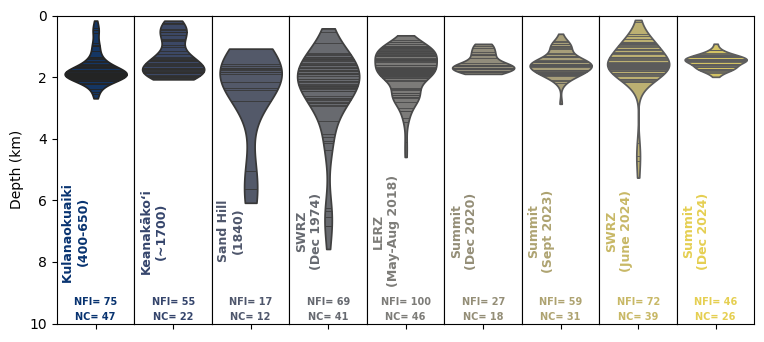

In [99]:
# Define datasets
datasets = [UW,K21,L84,Ulu_919, LERZ2018, K20, K23, K24, KD24]
titles = ["Kulanaokuaiki \n(400-650)", "Keanakākoʻi\n(~1700)", "Sand Hill\n(1840)", "SWRZ\n(Dec 1974)", 
          "LERZ\n(May-Aug 2018)", "Summit\n(Dec 2020)", "Summit\n(Sept 2023)", "SWRZ\n(June 2024)", "Summit\n(Dec 2024)"]

# Define the number of subplots based on datasets
num_axes = len(datasets)

# Generate colors using a seaborn color palette
annotation_colors = sns.color_palette("cividis", num_axes)  # Darker contrasting colors

# Create subplots
fig, axes = plt.subplots(1, num_axes, figsize=(9, 4), sharey=True)

# Plot data
for i, (ax, data, title, ann_color) in enumerate(zip(axes, datasets, titles, annotation_colors)):
    
    # Create violin plot
    sns.violinplot(data=data['SingleCalc_D_km'], color=ann_color, inner='stick', ax=ax, cut=0)
    
    # Set y-axis properties
    ax.set_ylim([10, 0])  # Inverted y-axis
    if i == 0:
        ax.set_ylabel('Depth (km)')
    else:
        ax.yaxis.set_tick_params(left=False, labelleft=False)
    
    # Add title and annotation
    fontsize = 9
    ax.annotate(title, xy=(0.25, 0.3), xycoords='axes fraction', fontsize=fontsize,
                ha='center', va='center', color=ann_color, fontweight='bold', rotation=90)
    ax.annotate(f'NFI= {len(data)}', xy=(0.5, 0.07), xycoords='axes fraction', fontsize=fontsize-2,
                ha='center', va='center', color=ann_color, fontweight='bold')
    ax.annotate(f'NC= {len(data['Sample_crystal'].unique())}', xy=(0.5, 0.02), xycoords='axes fraction', fontsize=fontsize-2,
                ha='center', va='center', color=ann_color, fontweight='bold')

# Adjust layout and save
plt.subplots_adjust(wspace=0)  # Slight spacing between plots
fig.savefig(figpath + slash + 'Kil_violin_plot.pdf', format='pdf', dpi=300, transparent=False)


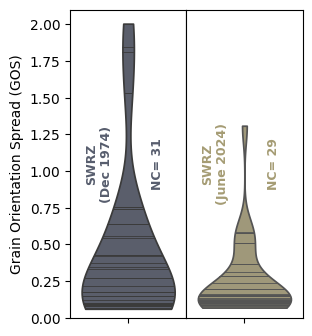

In [100]:
# Define datasets
datasets = [Ulu_919, K24]
titles = ["SWRZ\n(Dec 1974)", 
          "SWRZ\n(June 2024)"]

# Define the number of subplots based on datasets
num_axes = len(datasets)

# Generate colors using a seaborn color palette
annotation_colors = sns.color_palette("cividis", num_axes)  # Darker contrasting colors

# Create subplots
fig, axes = plt.subplots(1, num_axes, figsize=(3, 4), sharey=True)

# Plot data
for i, (ax, data, title, ann_color) in enumerate(zip(axes, datasets, titles, annotation_colors)):
    
    # Create violin plot
    sns.violinplot(data=data['GOS'], color=ann_color, inner='stick', ax=ax, cut=0)
    
    # Set y-axis properties
    ax.set_ylim([0,2.1])  # Inverted y-axis
    if i == 0:
        ax.set_ylabel('Grain Orientation Spread (GOS)')
    else:
        ax.yaxis.set_tick_params(left=False, labelleft=False)
    
    # Add title and annotation
    fontsize = 9
    ax.annotate(title, xy=(0.25, 0.5), xycoords='axes fraction', fontsize=fontsize,
                ha='center', va='center', color=ann_color, fontweight='bold', rotation=90)
    ax.annotate(f'NC= {data[(data['GOS'].notna()) & (data['Sample_crystal'].notna())]['Sample_crystal'].nunique()}',
                xy=(0.75, 0.5), xycoords='axes fraction', fontsize=fontsize,
                ha='center', va='center', color=ann_color, fontweight='bold', rotation=90)

# Adjust layout and save
plt.subplots_adjust(wspace=0)  # Slight spacing between plots
fig.savefig(figpath + slash + 'GOS_violin_plot.pdf', format='pdf', dpi=300, transparent=False)


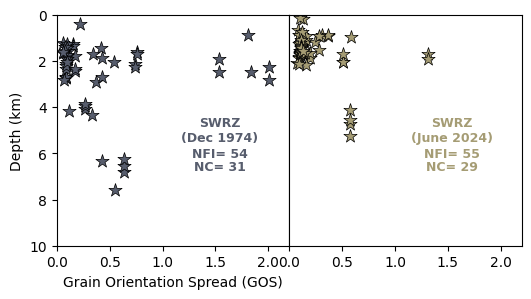

In [101]:
# Define datasets
datasets = [Ulu_919, K24]
titles = ["SWRZ\n(Dec 1974)", 
          "SWRZ\n(June 2024)"]

# Define the number of subplots based on datasets
num_axes = len(datasets)

# Generate colors using a seaborn color palette
annotation_colors = sns.color_palette("cividis", num_axes)  # Darker contrasting colors

# Create subplots
fig, axes = plt.subplots(1, num_axes, figsize=(6, 3), sharey=True)

# Plot data
for i, (ax, data, title, ann_color) in enumerate(zip(axes, datasets, titles, annotation_colors)):
    
    # Create violin plot
    ax.scatter(x=data['GOS'],y=data['SingleCalc_D_km'],marker='*',s=100,linewidths=0.5,edgecolors='k',color=ann_color)
    # sns.violinplot(data=data['GOS'], color=ann_color, inner='stick', ax=ax, cut=0)
    
    # Set y-axis properties
    ax.set_ylim([10,0])  # Inverted y-axis
    ax.set_xlim([0,2.2])  # Inverted y-axis
    if i == 0:
        ax.set_ylabel('Depth (km)')
        ax.set_xlabel('Grain Orientation Spread (GOS)')
    else:
        ax.yaxis.set_tick_params(left=False, labelleft=False)

    
    # Add title and annotation
    fontsize = 9
    ax.annotate(title, xy=(0.7, 0.5), xycoords='axes fraction', fontsize=fontsize,
                ha='center', va='center', color=ann_color, fontweight='bold', rotation=0)
    ax.annotate(f'NFI= {len(data[(data['GOS'].notna())])}', xy=(0.7, 0.4), xycoords='axes fraction', fontsize=fontsize,
                ha='center', va='center', color=ann_color, fontweight='bold', rotation=0)
    ax.annotate(f'NC= {data[(data['GOS'].notna()) & (data['Sample_crystal'].notna())]['Sample_crystal'].nunique()}', xy=(0.7, 0.34), xycoords='axes fraction', fontsize=fontsize,
                ha='center', va='center', color=ann_color, fontweight='bold', rotation=0)

# Adjust layout and save
plt.subplots_adjust(wspace=0)  # Slight spacing between plots
fig.savefig(figpath + slash + 'Pressure vs GOS_plot.pdf', format='pdf', dpi=300, transparent=False)


## Import Kendra unpubd olivines

In [102]:
KD24_ols_Kendra=pd.read_excel(MasterFolder+slash+"Data"+slash+"Unpubd data from Kendra"+slash+"December2024HMM_Diffusion_Master_01142025.xlsx",sheet_name="CoreRim Master")

KD24_ols_Kendra =KD24_ols_Kendra.loc[:, ~KD24_ols_Kendra.columns.str.contains('Unnamed')].drop(KD24_ols_Kendra.tail(6).index)

KD24_ols_Kendra

,SAMPLE,SiO2 WT%,MgO WT%,FeO WT%,NiO WT%,CaO WT%,Total,Fo
0,KS24-617-WORI-1_ol1 Ave,39.484433,42.966033,16.818300,0.220630,0.252090,99.741487,81.994967
1,KS24-617-WORI-1_ol2 Ave,39.434500,43.270000,16.375867,0.230100,0.260377,99.570844,82.487267
2,KS24-617-WORI-1_ol3 Ave,39.454500,43.056700,16.785067,0.213760,0.263652,99.773679,82.055200
3,KS24-617-WORI-1_ol4 Ave,39.609700,43.774300,16.067400,0.240889,0.259273,99.951562,82.924867
4,KS24-617-WORI-1_ol5 Ave,39.827767,43.399333,16.089133,0.238321,0.259320,99.813874,82.783567
5,KS24-617-WORI-1_ol6 Ave,40.019867,43.167267,16.528433,0.209049,0.257977,100.182593,82.318333
6,KS24-617-WORI-1_ol7 Ave,39.756800,43.206733,16.186600,0.240085,0.262180,99.652399,82.633567
7,KS24-617-WORI-1_ol8 Ave,39.803033,42.790733,16.536900,0.236558,0.264095,99.631320,82.182900
8,KS24-617-WORI-1_ol9 Ave,39.686100,43.112600,16.428300,0.238447,0.256796,99.722243,82.388200
9,KS24-617-WORI-1_ol10 Ave,39.918667,43.145633,16.432300,0.224824,0.279385,100.000808,82.395733


(74.0, 91.0)

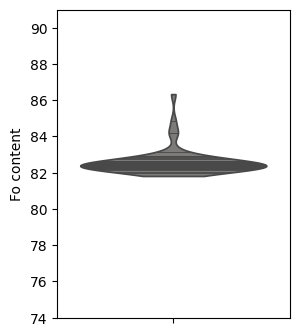

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define datasets
datasets = [KD24_ols_Kendra]  # Can have more datasets, but for now let's assume one
titles = ["SWRZ\n(Dec 1974)"]

# Define the number of subplots based on datasets
num_axes = len(datasets)

# Generate colors using a seaborn color palette
annotation_colors = sns.color_palette("cividis", num_axes)  # Darker contrasting colors

# Create subplots
fig, axes = plt.subplots(1, num_axes, figsize=(3, 4), sharey=True)

# If there's only one axis, make it iterable (like a list)
if num_axes == 1:
    axes = [axes]

# Plot data
for i, (ax, data, title, ann_color) in enumerate(zip(axes, datasets, titles, annotation_colors)):
    
    # Create violin plot
    sns.violinplot(data=data['Fo'], color=ann_color, inner='stick', ax=ax, cut=0)
    
    # Set y-axis properties
    ax.set_ylim([0, 2.1])  # Inverted y-axis
    if i == 0:
        ax.set_ylabel('Fo content')
    else:
        ax.yaxis.set_tick_params(left=False, labelleft=False)
    
    # Add title and annotation
    fontsize = 9
    # ax.annotate(title, xy=(0.25, 0.5), xycoords='axes fraction', fontsize=fontsize,
    #             ha='center', va='center', color=ann_color, fontweight='bold', rotation=90)
    # ax.annotate(f'NC= {data[(data['GOS'].notna()) & (data['Sample_crystal'].notna())]['Sample_crystal'].nunique()}',
    #             xy=(0.75, 0.5), xycoords='axes fraction', fontsize=fontsize,
    #             ha='center', va='center', color=ann_color, fontweight='bold', rotation=90)

# Adjust layout and save
plt.subplots_adjust(wspace=0)  # Slight spacing between plots
fig.savefig(figpath + slash + 'Dec24_Kendra_Ol_violin_plot.pdf', format='pdf', dpi=300, transparent=False)

# Optionally set xlim
ax.set_ylim([74, 91])


#### Depth vs Fo

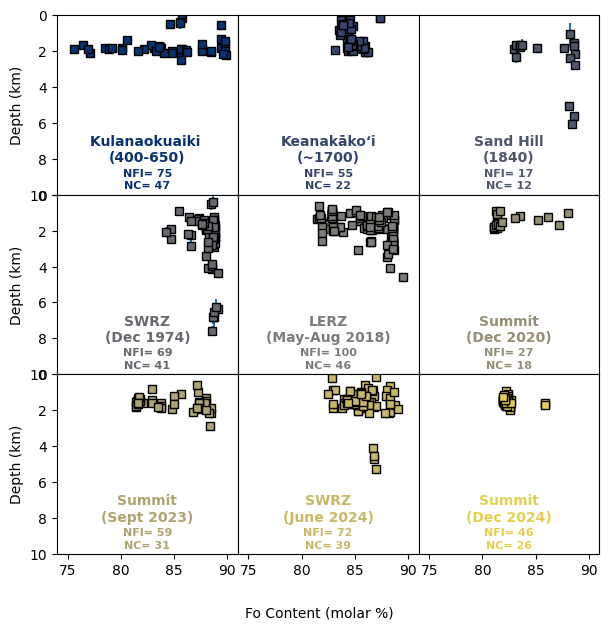

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Define datasets
datasets = [UW, K21, L84, Ulu_919, LERZ2018, K20, K23, K24, KD24]
titles = ["Kulanaokuaiki \n(400-650)", "Keanakākoʻi\n(~1700)", "Sand Hill\n(1840)", "SWRZ\n(Dec 1974)", 
          "LERZ\n(May-Aug 2018)", "Summit\n(Dec 2020)", "Summit\n(Sept 2023)", "SWRZ\n(June 2024)", "Summit\n(Dec 2024)"]

num_axes = len(datasets)
num_cols = math.ceil(num_axes / 3)  # Compute number of columns for 2 rows

# Generate colors using a seaborn color palette
annotation_colors = sns.color_palette("cividis", num_axes)

# Create subplots with 3 rows
fig, axes = plt.subplots(3, num_cols, figsize=(7, 7), sharey=True, sharex=True)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot data
for i, (ax, data, title, ann_color) in enumerate(zip(axes, datasets, titles, annotation_colors)):
    
    # Determine which column to use for 'x'
    if 'May-Aug 2018' in title:
        x = data['Corrected Fo content (molar %)_Cambridge']
    elif 'Sept 2023' in title:
        x = data['Fo']*100
    else:
        # Handle cases where 'Fo_Ol' is all NaN or missing
        if 'Fo_Ol' in data.columns and not data['Fo_Ol'].dropna().empty:
            x = data['Fo_Ol']*100
        else:
            x = np.full(len(data), np.nan)  # Placeholder array of NaNs

    # Plot only if x has valid values
    if not all(pd.isna(x)):
        ax.errorbar(x=x, y=data['SingleCalc_D_km'], yerr=data['std_dev_MC_D_km'],
                    mec='k', mfc=ann_color, fmt='s')

    # Set axis limits
    ax.set_ylim([10, 0])  # Inverted y-axis
    ax.set_xlim([74, 91])  

    if i % num_cols == 0:
        ax.set_ylabel('Depth (km)')
    else:
        ax.yaxis.set_tick_params(left=False, labelleft=False)

    # Ensure tick marks for x-axis
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=(i >= num_axes - num_cols))
    
    # Add title and annotation
    fontsize = 10
    ax.annotate(title, xy=(0.5, 0.25), xycoords='axes fraction', fontsize=fontsize,
                ha='center', va='center', color=ann_color, fontweight='bold')
    
    ax.annotate(f'NFI= {len(data)}', xy=(0.5, 0.12), xycoords='axes fraction', fontsize=fontsize-2,
                ha='center', va='center', color=ann_color, fontweight='bold')

    ax.annotate(f'NC= {len(data["Sample_crystal"].unique())}', xy=(0.5, 0.05), xycoords='axes fraction', 
                fontsize=fontsize-2, ha='center', va='center', color=ann_color, fontweight='bold')

# Hide empty subplots if necessary
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.subplots_adjust(hspace=0, wspace=0)

# Add x-axis label only on the bottom row
fig.text(0.5, 0.02, 'Fo Content (molar %)', ha='center', fontsize=10)

# Save figure
fig.savefig(figpath + slash + 'Kil_Fodepth_plot.pdf', format='pdf', dpi=300, transparent=False)

plt.show()


# UP TO HERE I CLEANED UP ON JAN 30 2025

## Lets get the equilibrium Olivine Fo contents here 

In [11]:
Ulu_MG_input=pt.import_excel('/Users/cljd/Documents/Python_dev/PrePostCalderaKil_2025/Version_on_pcloud/Kilauea2024_RapidResponseSWRZ_GDrive_latest/1974_olivine_glass_data/UluData.xlsx',
                         sheet_name='Matrix Glass')
Ulu_all=Ulu_MG_input['my_input'] ## All columns
Ulu_Liqs_all=Ulu_MG_input['Liqs'] ## Just Liquid columns
Ulu_Liqs_19=Ulu_Liqs_all.loc[Ulu_all['Eruption']==919]
Ulu_Liqs_19.head()
Mean_19=np.mean(Ulu_Liqs_19)

NameError: name 'pt' is not defined

In [56]:
## Glasses 


K24_MG_input=pt.import_excel(r'GlassData2024.xlsx',
                         sheet_name='glass', suffix='_Liq')
K24_all=K24_MG_input['my_input'] ## All columns
K24_Liqs_all=K24_MG_input['Liqs'] ## Just Liquid columns
Liq_Mean_24=np.mean(K24_Liqs_all)

In [57]:
K24_Liqs_all

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,49.5836,1.9870,13.9269,11.9916,0.2289,6.5309,10.7876,2.6928,0.2097,0.0,0.2532,0.0,0.0,0.0,0.0,0.0,0
1,49.4155,2.0029,13.8746,11.8569,0.2258,6.6142,10.7479,2.7164,0.1747,0.0,0.2057,0.0,0.0,0.0,0.0,0.0,1
2,49.6459,2.0178,13.8297,11.8792,0.2454,6.5330,10.8564,2.7839,0.2095,0.0,0.1946,0.0,0.0,0.0,0.0,0.0,2
3,50.6236,2.9163,13.9494,10.8721,0.1965,6.3378,10.9124,2.4751,0.5062,0.0,0.2584,0.0,0.0,0.0,0.0,0.0,3
4,50.4679,2.8971,13.9718,10.8212,0.2244,6.3854,10.8649,2.5100,0.5404,0.0,0.2302,0.0,0.0,0.0,0.0,0.0,4
5,51.1935,2.9535,14.1871,10.8275,0.1853,6.4555,10.9437,2.4221,0.5239,0.0,0.2929,0.0,0.0,0.0,0.0,0.0,5
6,50.8685,2.8981,14.1024,10.8489,0.1964,6.4336,10.9767,2.5362,0.5137,0.0,0.2931,0.0,0.0,0.0,0.0,0.0,6
7,51.4317,2.9307,14.2734,10.9645,0.1720,6.5610,11.0545,2.5762,0.5205,0.0,0.2915,0.0,0.0,0.0,0.0,0.0,7


In [58]:
Eq_Ol_19=pt.calculate_eq_ol_content(liq_comps=Ulu_Liqs_19, Kd_model="Shea2022",Fe3Fet_Liq=0.18)
Eq_Ol_24=pt.calculate_eq_ol_content(liq_comps=K24_Liqs_all, Kd_model="Shea2022",Fe3Fet_Liq=0.18)

In [59]:
np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.335)'])

0.834256220498497

In [60]:
MC_Av_rho_T_df_B

,Filename,i,CO2_density_input,SingleCalc_D_km,SingleCalc_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,...,T_K_input,error_T_K,CO2_dens_gcm3_input,error_CO2_dens_gcm3,crust_dens_kgm3_input,error_crust_dens_kgm3,model,EOS,XH2O_input,error_XH2O
0,K24_10_FIA_index41,0.0,0.048859,0.765054,0.174482,0.180207,0.177724,0.027972,0.026310,0.789301,...,1513.193250,50.0,0.048859,0.004082,None,0.0,denlinger_lerner,DZ06,0.176082,0.098100
1,K24_10_FIB_index42,1.0,0.056119,0.880502,0.201400,0.207104,0.204533,0.029300,0.027466,0.904491,...,1537.338539,50.0,0.056119,0.004361,None,0.0,denlinger_lerner,DZ06,0.162563,0.090331
2,K24_11_FIA_index43,2.0,0.125982,1.824668,0.427481,0.431687,0.429072,0.029930,0.028741,1.841449,...,1510.998480,50.0,0.125982,0.004292,None,0.0,denlinger_lerner,DZ06,0.083090,0.045284
3,K24_11_FIB_index44,3.0,0.085747,1.275439,0.294670,0.301187,0.298416,0.052669,0.051561,1.301530,...,1510.998480,50.0,0.085747,0.012513,None,0.0,denlinger_lerner,DZ06,0.122193,0.067263
4,K24_11_FIC_index45,4.0,0.129648,1.877827,0.440530,0.444677,0.442191,0.030028,0.028910,1.894326,...,1513.129226,50.0,0.129648,0.004284,None,0.0,denlinger_lerner,DZ06,0.080335,0.043765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,K24_40_FIA_index166,144.0,0.113685,1.730300,0.404402,0.408076,0.406533,0.029734,0.029925,1.744982,...,1586.619996,50.0,0.113685,0.004704,None,0.0,denlinger_lerner,DZ06,0.088370,0.048212
145,K24_40_FIB_index167,145.0,0.127505,1.937626,0.455249,0.454856,0.454017,0.030871,0.030812,1.935641,...,1594.037690,50.0,0.127505,0.004580,None,0.0,denlinger_lerner,DZ06,0.077382,0.042144
146,KL0919-013-A-rep2-6mW_index147,146.0,0.429251,7.223926,1.921074,1.917373,1.922320,0.080665,0.078526,7.210999,...,1584.076867,50.0,0.429251,0.005502,None,0.0,denlinger_lerner,DZ06,0.020000,0.000000
147,KL0919-013-B-rep2-6mW_index148,147.0,0.387546,6.335518,1.654795,1.651313,1.653855,0.063733,0.064060,6.323106,...,1585.208665,50.0,0.387546,0.003067,None,0.0,denlinger_lerner,DZ06,0.020000,0.000000


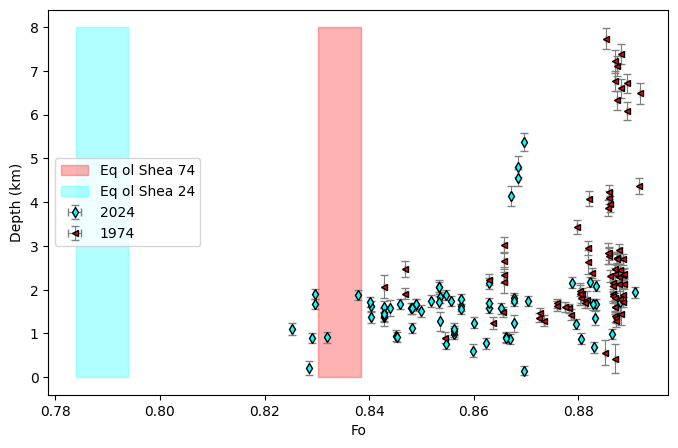

In [61]:
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))

# Calculate x coordinates
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])

# Plot rectangle
plt.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])

# Plot rectangle
plt.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')


ax1.errorbar(df_combo['Fo'].loc[K24], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[K24], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='2024')
ax1.errorbar(df_combo['Fo'].loc[U919], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[U919], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='1974')


ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
plt.legend()#
fig.savefig('FoDepth.png', dpi=300)

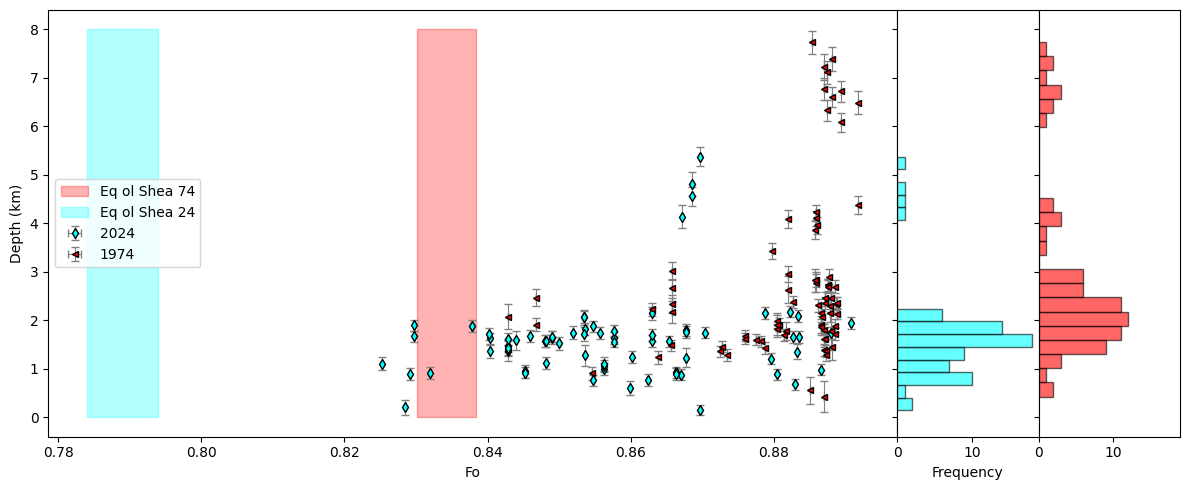

In [62]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.5], wspace=0)

ax1 = plt.subplot(gs[0])

# Calculate x coordinates and plot rectangles for Eq_Ol_19
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates and plot rectangles for Eq_Ol_24
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')

# Plot error bars
ax1.errorbar(df_combo['Fo'].loc[K24], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[K24], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='2024')
ax1.errorbar(df_combo['Fo'].loc[U919], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[U919], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='1974')

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

# Histogram plot
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1, sharex=ax2)
ax2.hist(MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[K24], bins=20, stacked=True, orientation='horizontal', color=['cyan'], ec='k', alpha=0.6)
ax3.hist(MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[U919], bins=25, stacked=True, orientation='horizontal', color=['red'], ec='k', alpha=0.6)

ax2.set_xlabel('Frequency')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.tight_layout()
fig.savefig('FoDepth.png', dpi=300)
plt.show()

In [87]:
df_merged=pd.merge(left=df_combo,right=MC_Av_rho_T_df_B,left_on='filename_4merge',right_on='Filename',suffixes=('_og', '_pwrecalc'))
# df_merged.to_clipboard(excel=True)

EBSD_tags=pd.read_excel('/Users/cljd/pCloud Drive/WORK-GENERAL/POSTDOC-UCB/BERKELEY-VIBE/Documents/Projects/Kil_SWRZ/EBSD/Combined_EBSD/Raman+EDS+EBSDtags.xlsx')

df_wEBSDtags=pd.merge(left=df_merged,right=EBSD_tags,left_on='filename_4merge',right_on='filename_4merge')

df_wEBSDtags.to_clipboard(excel=True)

EBSD_data=pd.read_excel('/Users/cljd/pCloud Drive/WORK-GENERAL/POSTDOC-UCB/BERKELEY-VIBE/Documents/Projects/Kil_SWRZ/EBSD/Combined_EBSD/EBSD_combined_all.xlsx')

df_wEBSDtags['EBSDname+grainID'] = df_wEBSDtags['EBSD_simple_name'].astype(str) +'_'+ df_wEBSDtags['EBSD_grainID'].astype(str)
EBSD_data['EBSDname+grainID'] = EBSD_data['EBSD_name'].astype(str) + '_'+ EBSD_data['grainID'].astype(str)

final_df=pd.merge(left=df_wEBSDtags,left_on='EBSDname+grainID',right=EBSD_data,right_on='EBSDname+grainID',suffixes=('_main', '_EBSDdata'),how='left')

##### Export fully merge data ####

final_df.to_excel("Final_data_wEBSD.xlsx")
final_df

In [64]:
EBSD_data=pd.read_excel('/Users/cljd/pCloud Drive/WORK-GENERAL/POSTDOC-UCB/BERKELEY-VIBE/Documents/Projects/Kil_SWRZ/EBSD/Combined_EBSD/EBSD_combined_all.xlsx')

df_wEBSDtags['EBSDname+grainID'] = df_wEBSDtags['EBSD_simple_name'].astype(str) +'_'+ df_wEBSDtags['EBSD_grainID'].astype(str)
EBSD_data['EBSDname+grainID'] = EBSD_data['EBSD_name'].astype(str) + '_'+ EBSD_data['grainID'].astype(str)

final_df=pd.merge(left=df_wEBSDtags,left_on='EBSDname+grainID',right=EBSD_data,right_on='EBSDname+grainID',suffixes=('_main', '_EBSDdata'),how='left')

##### Export fully merge data ####

final_df.to_excel("Final_data_wEBSD.xlsx")
final_df

,Mount,filename,filename_4merge,Name_on_SEM,Notes regarding SEM matching,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,...,GB Length/Sqrt Size,Total GB length,Tilt length,Twist length,Perc Tilt,Perc Twist,Perc unclassified,Divangle,Deformed,Day_EBSDdata
0,A,K24_10_FIA,K24_10_FIA_index41,K24_10_FIA,NaN,0.048859,0.004082,0.001386,0.003840,102.873563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,K24_10_FIB,K24_10_FIB_index42,K24_10_FIB,NaN,0.056119,0.004361,0.002092,0.003826,102.891885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A,K24_11_FIA,K24_11_FIA_index43,"K24_11_FIA,B",NaN,0.125982,0.004292,0.001919,0.003839,103.068198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A,K24_11_FIB,K24_11_FIB_index44,"K24_11_FIA,B",NaN,0.085747,0.012513,0.011921,0.003801,102.966658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A,K24_11_FIC,K24_11_FIC_index45,K24_11_FIC,NaN,0.129648,0.004284,0.001886,0.003846,103.077452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NaN,K24_40_FIA,K24_40_FIA_index166,K24_40_FIA,NaN,0.113685,0.004704,0.002748,0.003818,103.037164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,K24_40_FIB,K24_40_FIB_index167,K24_40_core,NaN,0.127505,0.004580,0.002494,0.003842,103.072041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,KL0919-013-A-rep2-6mW,KL0919-013-A-rep2-6mW_index147,KL0919_013_FIA,NaN,0.429251,0.005502,0.004975,0.002350,103.779896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,KL0919-013-B-rep2-6mW,KL0919-013-B-rep2-6mW_index148,KL0919_013_FIB,NaN,0.387546,0.003067,0.001973,0.002348,103.686032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
K24=final_df['filename'].str.contains('K24')
U919=final_df['filename'].str.contains('919')

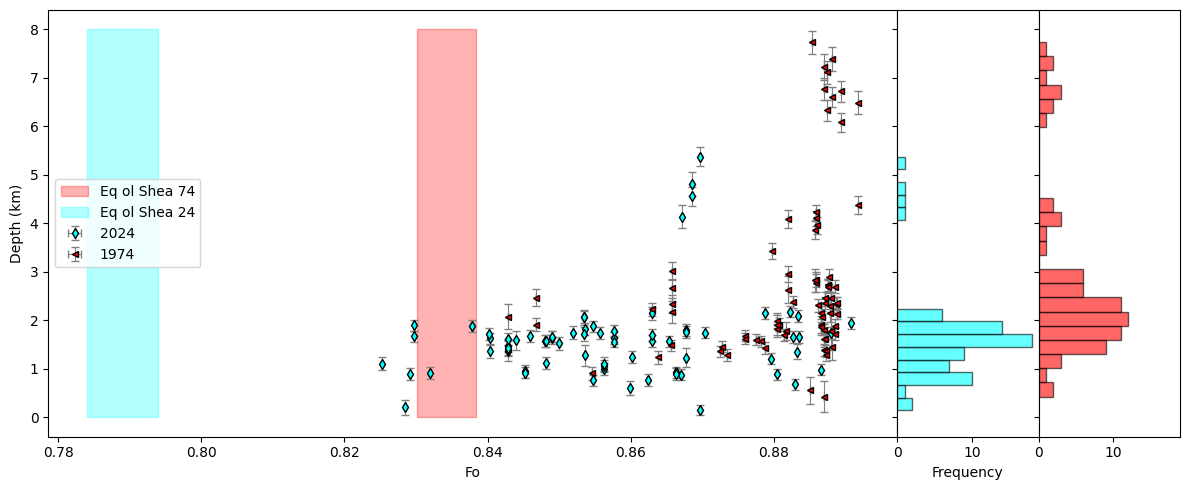

In [66]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Combine GOS values from both datasets
all_GOS = final_df['GOS']

# Global min and max of GOS
global_min_GOS = all_GOS.min()
global_max_GOS = all_GOS.max()

# Normalize GOS for marker sizing
normalized_GOS_K24 = (final_df['GOS'].loc[K24] - global_min_GOS) / (global_max_GOS - global_min_GOS)
normalized_GOS_U919 = (final_df['GOS'].loc[U919] - global_min_GOS) / (global_max_GOS - global_min_GOS)

# Scale marker sizes (e.g., between 5 and 15)
marker_size_K24 = 5 + 10 * normalized_GOS_K24
marker_size_U919 = 5 + 10 * normalized_GOS_U919

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.5], wspace=0)

ax1 = plt.subplot(gs[0])

# Calculate x coordinates and plot rectangles for Eq_Ol_19
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates and plot rectangles for Eq_Ol_24
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')

# Plot error bars with marker sizes based on GOS
ax1.errorbar(final_df['Fo'].loc[K24], final_df['SingleCalc_D_km'].loc[K24], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024', ms=5)
ax1.errorbar(final_df['Fo'].loc[U919], final_df['SingleCalc_D_km'].loc[U919], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974', ms=5)

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

# Histogram plot
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1, sharex=ax2)
ax2.hist(final_df['SingleCalc_D_km'].loc[K24], bins=20, stacked=True, orientation='horizontal', color=['cyan'], ec='k', alpha=0.6)
ax3.hist(final_df['SingleCalc_D_km'].loc[U919], bins=25, stacked=True, orientation='horizontal', color=['red'], ec='k', alpha=0.6)

ax2.set_xlabel('Frequency')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.tight_layout()
fig.savefig('FoDepth.png', dpi=300)
plt.show()


In [86]:
final_df['GOS']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
144   NaN
145   NaN
146   NaN
147   NaN
148   NaN
Name: GOS, Length: 149, dtype: float64

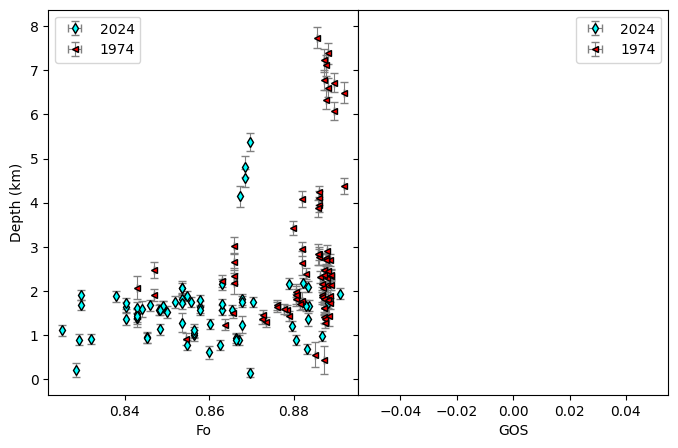

In [85]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (8,5),sharey=True)

ax1.errorbar(final_df['Fo'].loc[K24], final_df['SingleCalc_D_km'].loc[K24], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024', ms=5)
ax1.errorbar(final_df['Fo'].loc[U919], final_df['SingleCalc_D_km'].loc[U919], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974', ms=5)

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

ax2.errorbar(final_df['GOS'].loc[K24], final_df['SingleCalc_D_km'].loc[K24], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024', ms=5)
ax2.errorbar(final_df['GOS'].loc[U919], final_df['SingleCalc_D_km'].loc[U919], xerr=0, yerr=final_df['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974', ms=5)

ax2.set_xlabel('GOS')

ax2.legend()
plt.subplots_adjust(wspace=0) 

In [118]:
final_df[final_df['SingleCalc_D_km']>4][['filename','GOS','SingleCalc_D_km']]

,filename,GOS,SingleCalc_D_km
80,KL0919-008-A,0.554341,7.737790
90,KL0919-013-A,0.635922,6.771967
91,KL0919-013-B,0.635922,7.111117
92,KL0919-013-C,0.635922,6.719386
110,919_56_A,0.118908,4.229915
111,919_56_A_drift,0.118908,4.106109
112,919_58_A,0.266591,4.084473
116,919_60_A,0.428472,6.489178
122,919_65_A_rep1_12mW,NaN,6.605082
123,919_65_A_rep2_6mW,NaN,7.388014


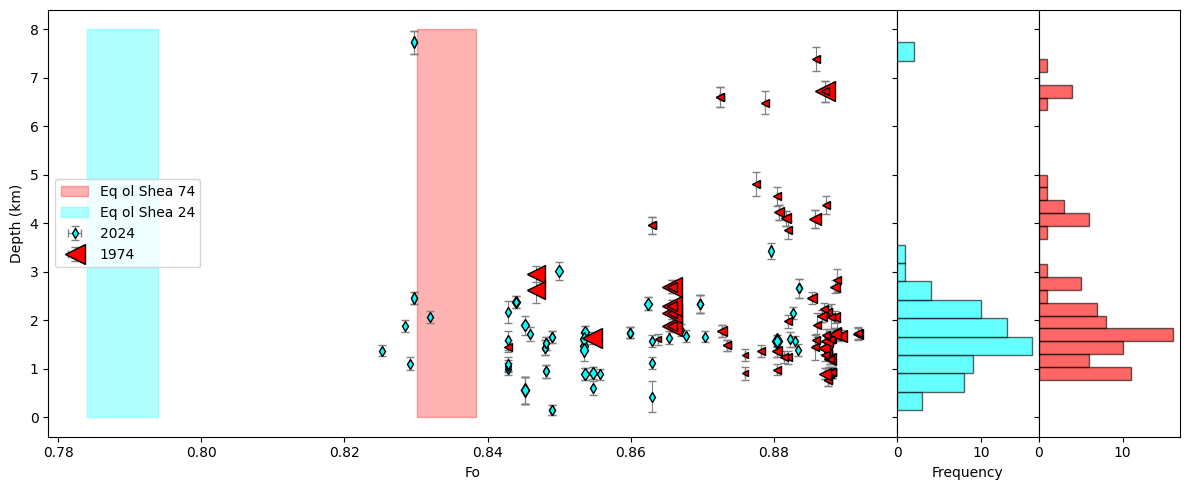

In [47]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Combine GOS values from both datasets
all_GOS = final_df['GOS']

# Global min and max of GOS
global_min_GOS = all_GOS.min()
global_max_GOS = all_GOS.max()

# Normalize GOS for marker sizing
normalized_GOS_K24 = (final_df['GOS'].loc[K24] - global_min_GOS) / (global_max_GOS - global_min_GOS)
normalized_GOS_U919 = (final_df['GOS'].loc[U919] - global_min_GOS) / (global_max_GOS - global_min_GOS)

# Scale marker sizes (e.g., between 5 and 15)
marker_size_K24 = 5 + 10 * normalized_GOS_K24
marker_size_U919 = 5 + 10 * normalized_GOS_U919

fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.5], wspace=0)

ax1 = plt.subplot(gs[0])

# Calculate x coordinates and plot rectangles for Eq_Ol_19
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates and plot rectangles for Eq_Ol_24
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')

# Plot error bars with marker sizes based on GOS
for i, (fo, depth, yerr, size) in enumerate(zip(final_df['Fo'].loc[K24], final_df['SingleCalc_D_km_pwrecalc'].loc[K24], final_df['std_dev_MC_D_km_from_percentile_pwrecalc'].loc[K24], marker_size_K24)):
    ax1.errorbar(fo, depth, xerr=0, yerr=yerr, fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', mec='k', capsize=3, label='2024' if i == 0 else "", ms=size)

for i, (fo, depth, yerr, size) in enumerate(zip(final_df['Fo'].loc[U919], final_df['SingleCalc_D_km_pwrecalc'].loc[U919], final_df['std_dev_MC_D_km_from_percentile_pwrecalc'].loc[U919], marker_size_U919)):
    ax1.errorbar(fo, depth, xerr=0, yerr=yerr, fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', mec='k', capsize=3, label='1974' if i == 0 else "", ms=size)

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

# Histogram plot
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1, sharex=ax2)
ax2.hist(final_df['SingleCalc_D_km_pwrecalc'].loc[K24], bins=20, stacked=True, orientation='horizontal', color=['cyan'], ec='k', alpha=0.6)
ax3.hist(final_df['SingleCalc_D_km_pwrecalc'].loc[U919], bins=25, stacked=True, orientation='horizontal', color=['red'], ec='k', alpha=0.6)

ax2.set_xlabel('Frequency')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.tight_layout()
fig.savefig('FoDepth.png', dpi=300)
plt.show()


#### Below this are tests ###

/var/folders/r2/dcn33vbj1x1b46n5mm7vn9bc0000gn/T/ipykernel_8604/2525518762.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


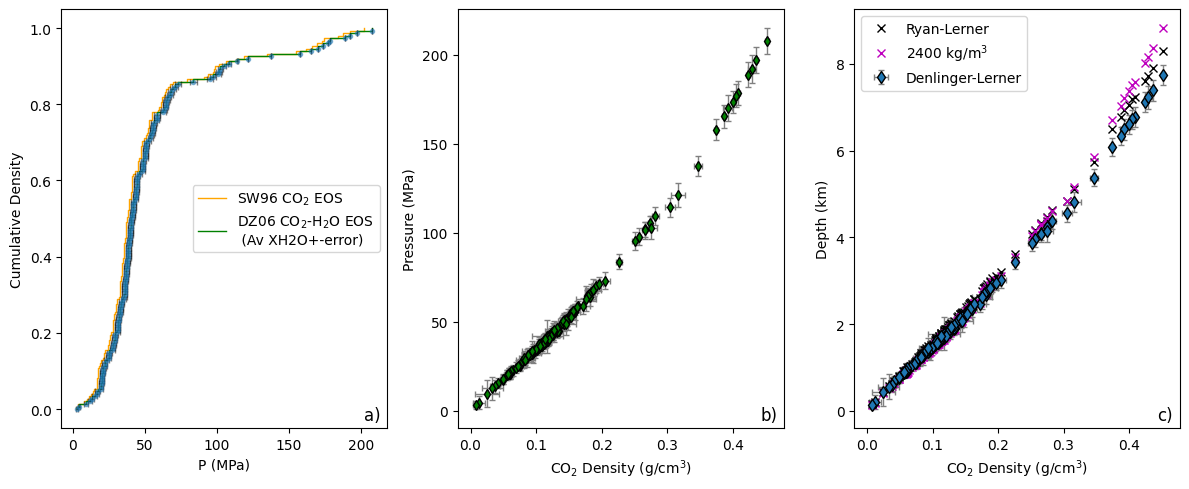

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))


## LETS SHOW A CDF FUNCTION OF THE PRESSURE DIFFERENCE - ITS SMALL ############

x1=100*P_DZ062['P_kbar_pureCO2_SW96']
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='orange', linewidth=1, label='SW96 CO$_2$ EOS')

x1=100*P_DZ062['P_kbar_mixCO2_DZ06_Hloss']
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='green', linewidth=1, label='DZ06 CO$_2$-H$_2$O EOS \n (Av XH2O+-error)')
plt.legend()

x2=100*P_DZ06_MinXH2O2['P_kbar_mixCO2_DZ06_Hloss']
x2_sorted=np.sort(x2)
# ax1.step(np.concatenate([x2_sorted, x2_sorted[[-1]]]),
#          np.arange(x2_sorted.size+1)/x2_sorted.size, color='red', linewidth=1, linestyle='-', label='DZ06')
y = np.arange(x1_sorted.size + 1) / x1_sorted.size  # Cumulative probability for each step


x3=100*P_DZ06_MaxXH2O2['P_kbar_mixCO2_DZ06_Hloss']
x3_sorted=np.sort(x3)
# ax1.step(np.concatenate([x3_sorted, x3_sorted[[-1]]]),
#          np.arange(x3_sorted.size+1)/x3_sorted.size, color='blue', linewidth=1, linestyle='-', label='DZ06')
ax1.legend()
ax1.set_xlabel('P (MPa)')
ax1.set_ylabel('Cumulative Density')


error = np.full_like(x1_sorted, 5)  # Replace 5 with your actual error values

# Adding horizontal error bars - notice 'fmt='none'' for no central marker, adjust 'ecolor' and 'elinewidth' as needed
ax1.errorbar(x1_sorted, y[:-1], xerr=[x3_sorted-x1_sorted, x1_sorted-x2_sorted], fmt='o', ms=3, ecolor='k', capsize=2, elinewidth=1, alpha=0.5)


ax2.plot()

ax2.errorbar(df_combo['Density g/cm3'], 100*MC_Av_rho_T_df_B['SingleCalc_Press_kbar'], 
             xerr=df_combo['σ Density g/cm3'], yerr=100*MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'],
               fmt='d', mec='k',ecolor='grey', mfc='green', ms=5, capsize=2, elinewidth=1, alpha=1)

ax2.set_xlabel('CO$_2$ Density (g/cm$^{3}$)')
ax2.set_ylabel('Pressure (MPa)')


# Lets show different density-depth models

Depth_RL=pf.convert_pressure_to_depth(P_kbar=P_DZ062['P_kbar_mixCO2_DZ06_Hloss'], model='ryan_lerner')
Depth_2400=pf.convert_pressure_to_depth(P_kbar=P_DZ062['P_kbar_mixCO2_DZ06_Hloss'], crust_dens_kgm3=2400)

ax3.errorbar(df_combo['Density g/cm3'], MC_Av_rho_T_df_B['SingleCalc_D_km'], 
             xerr=df_combo['σ Density g/cm3'], yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'],
               fmt='d', mec='k',  ecolor='grey', capsize=2, elinewidth=1, alpha=1, label='Denlinger-Lerner')

ax3.plot(df_combo['Density g/cm3'], Depth_RL, 'xk', label='Ryan-Lerner')
ax3.plot(df_combo['Density g/cm3'], Depth_2400, 'xm', label='2400 kg/m$^{3}$')
ax3.set_xlabel('CO$_2$ Density (g/cm$^{3}$)')
ax3.set_ylabel('Depth (km)')
ax3.legend()
fig.tight_layout()

ax1.annotate("a)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
ax2.annotate("b)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
ax3.annotate("c)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
fig.savefig('Errors_2022FI.png', dpi=200)

In [55]:
np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.1512147049414154

In [56]:

np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'])*100

3.8183790524079484

In [57]:
np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.1512147049414154

In [58]:
df_combo_clip=df_combo.copy()
# Lets strip out the columns we dont want.
df_combo_clip = df_combo_clip[[col for col in df_combo_clip.columns if not any(x in col for x in
                             ['Unnamed', 'cpxprim', 'Fo content (mol%)',  '_y', 'Preferred D_σ_Ne',
                              'Preferred D_σ_pkfit', 'HighD_RT', 'LowD_RT', '_SC'
                              ])]]





In [59]:
df_combo_clip.to_clipboard(excel=True, index=False)

In [60]:
df_combo_clip.columns[100:200]

Index(['Mean_MC_D_km', 'Med_MC_D_km', 'std_dev_MC_D_km',
       'std_dev_MC_D_km_from_percentile', 'T_K_input', 'error_T_K',
       'CO2_dens_gcm3_input', 'error_CO2_dens_gcm3', 'crust_dens_kgm3_input',
       'error_crust_dens_kgm3', 'model', 'EOS', 'XH2O_input', 'error_XH2O',
       'Total_wt%', 'Total_Oxide%', 'Al2O3', 'CaO', 'Cr2O3', 'FeOt', 'MgO',
       'MnO', 'NiO', 'SiO2', 'TiO2', 'Oxide % Sigma_Al2O3',
       'Oxide % Sigma_CaO', 'Oxide % Sigma_Cr2O3', 'Oxide % Sigma_FeOt',
       'Oxide % Sigma_MgO', 'Oxide % Sigma_MnO', 'Oxide % Sigma_NiO',
       'Oxide % Sigma_SiO2', 'Oxide % Sigma_TiO2', 'Al2O3_norm', 'CaO_norm',
       'Cr2O3_norm', 'FeOt_norm', 'MgO_norm', 'MnO_norm', 'NiO_norm',
       'SiO2_norm', 'TiO2_norm', 'Wt%_Al', 'Wt%_Ca', 'Wt%_Cr', 'Wt%_Fe',
       'Wt%_Mg', 'Wt%_Mn', 'Wt%_Ni', 'Wt%_O', 'Wt%_Si', 'Wt%_Ti',
       'Wt% Sigma_Al', 'Wt% Sigma_Ca', 'Wt% Sigma_Cr', 'Wt% Sigma_Fe',
       'Wt% Sigma_Mg', 'Wt% Sigma_Mn', 'Wt% Sigma_Ni', 'Wt% Sigma_Si',
       'Wt% Si

In [61]:
MC_Av_rho_T_df_B.to_clipboard(excel=True, index=False)

In [62]:
np.nanmedian(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.12665081322074778

(array([60., 42., 10., 13.,  4., 10.,  7.,  2.,  0.,  1.]),
 array([2.32542797, 3.04277271, 3.76011745, 4.47746219, 5.19480693,
        5.91215167, 6.62949641, 7.34684115, 8.06418589, 8.78153063,
        9.49887537]),
 <BarContainer object of 10 artists>)

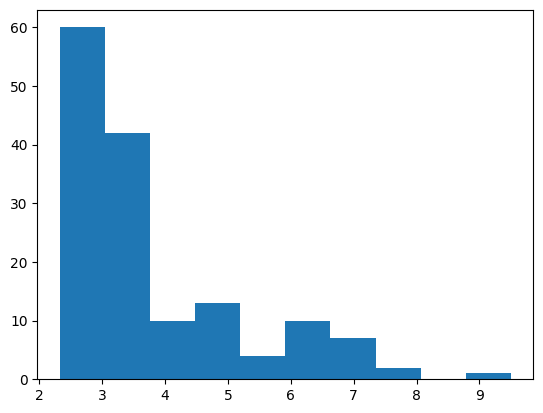

In [63]:
plt.hist(100*MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'])

In [64]:
MC_Av_rho_T_df_B.columns[0:100]

Index(['Filename', 'i', 'CO2_density_input', 'SingleCalc_D_km',
       'SingleCalc_Press_kbar', 'Mean_MC_P_kbar', 'Med_MC_P_kbar',
       'std_dev_MC_P_kbar', 'std_dev_MC_P_kbar_from_percentile',
       'Mean_MC_D_km', 'Med_MC_D_km', 'std_dev_MC_D_km',
       'std_dev_MC_D_km_from_percentile', 'T_K_input', 'error_T_K',
       'CO2_dens_gcm3_input', 'error_CO2_dens_gcm3', 'crust_dens_kgm3_input',
       'error_crust_dens_kgm3', 'model', 'EOS', 'XH2O_input', 'error_XH2O',
       'crystal'],
      dtype='object')

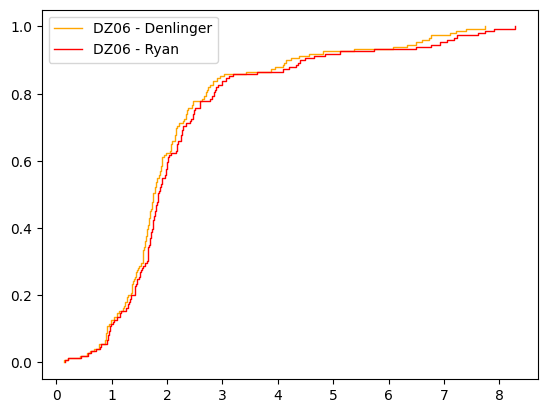

In [65]:
Depth_DL=pf.convert_pressure_to_depth(P_kbar=P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], model='denlinger_lerner')
x1=Depth_DL
x1_sorted=np.sort(x1)
plt.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='orange', linewidth=1, label='DZ06 - Denlinger')

Depth_RL=pf.convert_pressure_to_depth(P_kbar=P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], model='ryan_lerner')
x1=Depth_RL
x1_sorted=np.sort(x1)
plt.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='red', linewidth=1, label='DZ06 - Ryan')
plt.legend()